# Image recognition for digits

A model is build to recognize hand written digits using the dataset provided by `scikit-learn`.

In [1]:
from sklearn.datasets import load_digits
%matplotlib inline 
digits = load_digits()
digits.images.shape

(1797L, 8L, 8L)

The dataset contains 1797 images of `8x8` pixels. 

The figure below shows the first 100 digits.

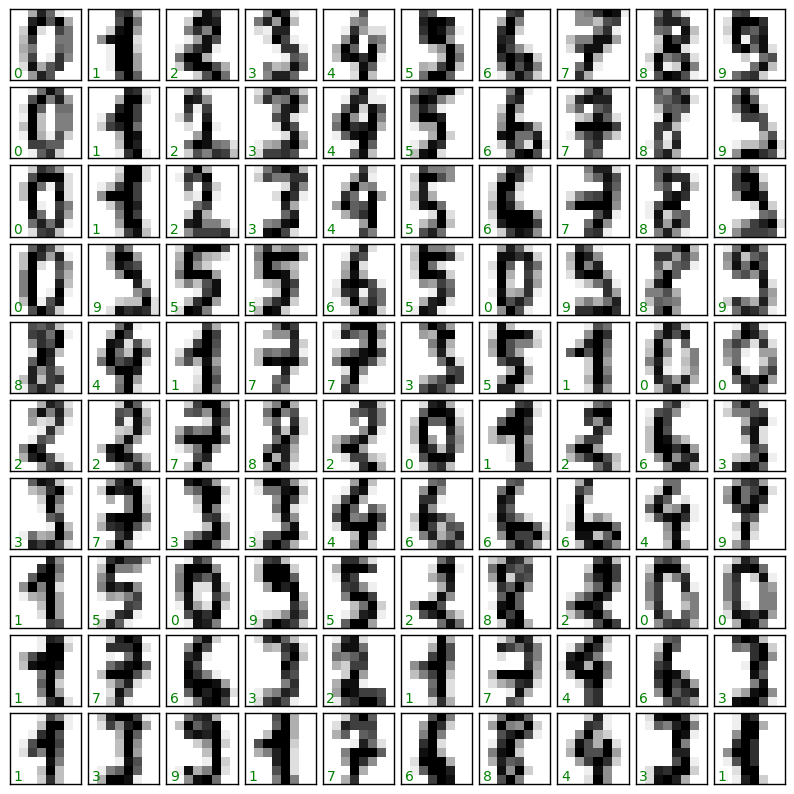

In [2]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10,10, figsize=(10,10),
                        subplot_kw= {'xticks':[],'yticks':[]},
                        gridspec_kw=dict(hspace=0.1,wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05, str(digits.target[i]),
           transform=ax.transAxes, color='green')

To train the model the data set must be separated between features (input `X` ) and labels (outputs `y`). We can represent each image as a 64 elements vector, thus definig 64 features.

In [3]:
X = digits.data
X.shape

(1797L, 64L)

In [4]:
y = digits.target
y.shape

(1797L,)

In order to visualize the dataset, each image is going to transform to a 2-dimensional space using a manifold algorithm called `Isomap`. We can see the results of this unspervised method for classifications in the image below. 

In [5]:
from sklearn.manifold import Isomap

In [6]:
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797L, 2L)

In [7]:
print "64 bytes array = %s"%X[0]
print "2D representation =%s"%data_projected[0]

64 bytes array = [  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]
2D representation =[ 167.27247954  -22.18515653]


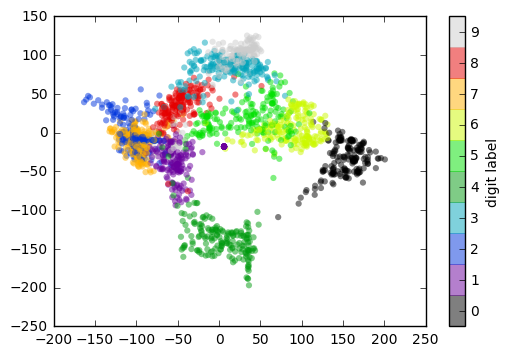

In [8]:
plt.scatter(data_projected[:,0],data_projected[:,1], c=digits.target,
           edgecolor = 'none', alpha = 0.5,
           cmap=plt.cm.get_cmap('spectral',10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5,9.5)

This representation shows that the digits grouped in well defined clusters, some of the clusters present an overlap, this is clear between the `ones` in purple and the `senvens` in orange.   

## Classification on digits

The previous representation shows that the digits are fairly well separated un the parameter space: this tell us that even a very straightforward supervised classification algorithm should perform sutirably on this data. 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=0)
model = GaussianNB()
model.fit(Xtrain,ytrain)
y_model = model.predict(Xtest)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_model)

0.83333333333333337

With this simple model we have about 80% accurtacy for classification. We can have a better overview of what went wrong using the `confusion matrix`. 


In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

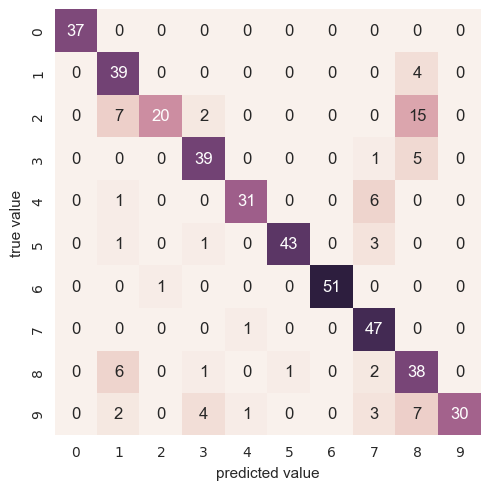

In [19]:
mat = confusion_matrix(ytest,y_model)

sns.heatmap(mat,square=True,annot=True,cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

We can visualize the predicted labels with the real image of the numbers. Labels will be:
* Green: Correct
* Red:   Wrong

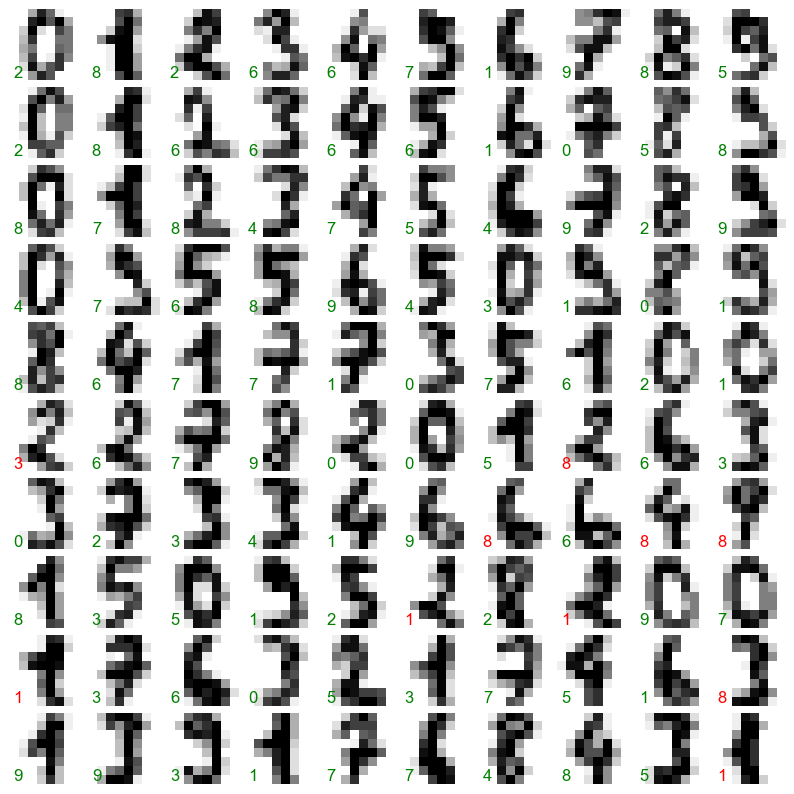

In [22]:
fig, axes = plt.subplots(10,10, figsize=(10,10),
                        subplot_kw= {'xticks':[],'yticks':[]},
                        gridspec_kw=dict(hspace=0.1,wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05, str(y_model[i]),
           transform=ax.transAxes,
           color='green' if (ytest[i] == y_model[i]) else 'red')